# IMPORT DATASET FROM GOOGLE DRIVE 


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip '/content/gdrive/MyDrive/traffic.v1i.yolov5pytorch.zip' -d '/content/gdrive/MyDrive/dataset'

#CLONING THE YOLO-V5 FILES FROM OFFICIAL REPOSITORY

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 12167, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 12167 (delta 13), reused 6 (delta 2), pack-reused 12140
Receiving objects: 100% (12167/12167), 12.60 MiB | 32.01 MiB/s, done.
Resolving deltas: 100% (8375/8375), done.


# CHANGING THE DIRECTORY

In [ ]:
%cd yolov5/

/content/yolov5


#INSTALLING THE DEPENDENCIES

In [ ]:
!pip install -r requirements.txt

#INSTALLING CUSTOM WEIGHTS FROM OFFICIAL WEBSITE FOR YOLO




In [ ]:
!wget https://github.com/ultralytics/yolov5/releases/download/v6.0/yolov5s.pt


# STEPS BEFORE TRAINING THE DATASET:
1. we went to yolov5/data/
2. opened coco128.yaml
3. Edited the following inside it:
    

      1.   Training and Test file path
      2.   Number of classes and Class names.



# TRAINING THE YOLO-V5 MODEL

In [ ]:
!python train.py --img 416 --batch 64 --epochs 50 --data coco128.yaml --weights bestf.pt --cache 

train: weights=bestf.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=64, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-86-gffdb58b Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, deg

# VISUALIZING THE TRAINING METRICS

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs/train

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/usr/local/lib/python3.7/dist-packages/tensorboard/main.py", line 46, in run_main
    app.run(tensorboard.main, flags_parser=tensorboard.configure)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 308, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 254, in _run_main
    sys.exit(main(argv))
  File "/usr/local/lib/python3.7/dist-packages/tensorboard/program.py", line 276, in main
    return runner(self.flags) or 0
  File "/usr/local/lib/python3.7/dist-packages/tensorboard/program.py", line 292, in _run_serve_subcommand
    server = sel

In [ ]:
!unzip '/content/imgs.zip' -d '/content'

Archive:  /content/imgs.zip
  inflating: /content/imgs/1.jpg     
  inflating: /content/imgs/2.jpg     
  inflating: /content/imgs/2016_Fiat_Ducato_42_Maxi_West_Midlands_Ambulance_Service_3.0.jpg  
  inflating: /content/imgs/3.jpg     
  inflating: /content/imgs/4.jpg     
  inflating: /content/imgs/car-drives-fast-highway-highlands-black-148886931.jpg  
  inflating: /content/imgs/download.jpg  
  inflating: /content/imgs/photo-1589828155685-83225f7d91f3.jpg  
  inflating: /content/imgs/9.jpg     
  inflating: /content/imgs/8.jpg     
  inflating: /content/imgs/11.JPG    


# DETECTING ON NEW IMAGES USING THE BEST.PT WE GOT FROM THE TRAINING ABOVE

In [ ]:

!python detect.py --source /content/imgs/8.jpg --weights /content/yolov5/runs/train/exp/weights/best.pt --img 416 --save-txt --save-conf --line-thickness 2 --hide-conf 

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/imgs/8.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=2, hide_labels=False, hide_conf=True, half=False, dnn=False
YOLOv5 🚀 v6.2-86-gffdb58b Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/imgs/8.jpg: 256x416 4 HMVs, 28 LMVs, 13.7ms
Speed: 0.4ms pre-process, 13.7ms inference, 1.2ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp123
1 labels saved to runs/detect/exp123/labels


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-9-2 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
Saved 1 image to runs/detect/exp125


image 1/1: 360x640 5 HMVs, 42 LMVs
Speed: 5.0ms pre-process, 9.2ms inference, 1.2ms NMS per image at shape (1, 3, 384, 640)


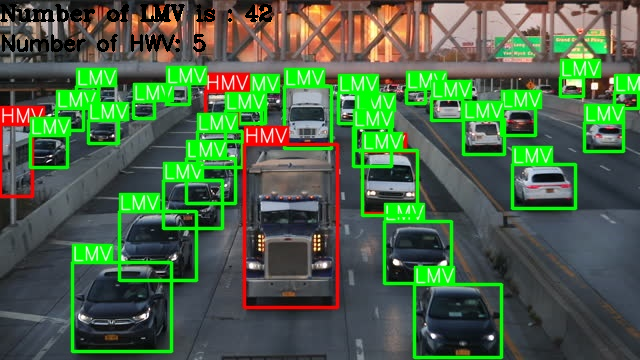

In [ ]:
import torch 
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

torch.hub._validate_not_a_forked_repo=lambda a,b,c: True
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/exp/weights/best.pt', force_reload=True)
results = model('/content/imgs/8.jpg')    # accessing the original image, all we need from the model is the classes of the objects
results.print()
results.save()
results.xyxy[0]  # im predictions (tensor)
results.pandas().xyxy[0]

x= (results.xyxyn[0][:,5])    # x is the class column of the tensor
y=x.tolist()                  # converting tensor to list in order to access it easily
lcount,hcount,i=0,0,0         # intializing the variables 
for clss in y:
  if y[int(i)] == 0.0 :       # if class is 0 heavy counter will count 
    hcount=1+hcount
  if y[int(i)] == 1.0 :       # if class is 1 light counter will count
    lcount=1+lcount
  i=i+1


img = cv2.imread('/content/yolov5/runs/detect/exp123/8.jpg')# here we are accessing the detected image from yolo detect.py because we have manpilated the colors of the bounding boxes
cv2.putText(img, "Number of LMV is : {}".format(lcount), (0, 20), cv2.FONT_HERSHEY_COMPLEX,  0.7, (0, 0, 0), 2)   # putting the text on the resulted image 
cv2.putText(img, "Number of HWV: {}".format(hcount), (0, 50), cv2.FONT_HERSHEY_SIMPLEX,  0.7, (0, 0, 0), 2)       
cv2_imshow(img)